# PROYECTO N°3: The GitHub History of the Scala Language
Encuentre a los verdaderos expertos de Scala explorando su historial de desarrollo en Git y GitHub. 

**Descripción del proyecto**
<p>
    Los proyectos de código abierto contienen historiales de desarrollo completos, como quién realizó los cambios, los cambios en sí y revisiones de código. En este proyecto, tendrá el desafío de leer, limpiar y visualizar el repositorio de proyectos del mundo real de Scala que abarca datos de un sistema de control de versiones (Git) y un sitio de alojamiento de proyectos (GitHub). Con casi 30.000 confirmaciones y una historia que abarca más de diez años, Scala es un lenguaje maduro. Descubrirás quién ha tenido más influencia en su desarrollo y quiénes son los expertos.
</p>
<p>
    El conjunto de datos incluye el historial del proyecto de <a href="https://www.scala-lang.org/">Scala</a> recuperado de Git y GitHub como un conjunto de archivos CSV </p>

**Project Tasks**
1. Scala's real-world project repository data
2. Preparing and cleaning the data
3. Merging the DataFrames
4. Is the project still actively maintained?
5. Is there camaraderie in the project?
6. What files were changed in the last ten pull requests?
7. Who made the most pull requests to a given file?
8. Who made the last ten pull requests on a given file?
9. The pull requests of two special developers
10. Visualizing the contributions of each developer

---

## 1. Scala's real-world project repository data
**(Datos del repositorio de proyectos del mundo real de Scala)**

Con casi 30k confirmaciones y una historia que abarca más de diez años, Scala es un lenguaje de programación maduro. Es un lenguaje de programación de uso general que se ha convertido recientemente en otro lenguaje destacado para los científicos de datos.

Scala también es un proyecto de código abierto. Los proyectos de código abierto tienen la ventaja de que todos sus historiales de desarrollo (quién realizó cambios, qué se cambió, revisiones de código, etc.) están disponibles públicamente.

Vamos a leer, limpiar y visualizar el repositorio de proyectos del mundo real de Scala que abarca datos de un sistema de control de versiones (Git) y un sitio de alojamiento de proyectos (GitHub). Descubriremos quién ha tenido más influencia en su desarrollo y quiénes son los expertos. 

**_pull requests (solicitudes de extracción)_**

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px">
        <b>datasets</b>
    </div>
    El conjunto de datos que usaremos, ha sido previamente extraído de GitHub,y se compone de tres archivos:
<ul>
    <li><b>pulls_2011-2013.csv:</b> Contiene la información básica sobre los  pull requests y abarca desde finales de 2011 hasta (pero sin incluir) 2014</li>
    <li><b>pulls_2014-2018.csv:</b> Contiene información idéntica y abarca desde 2014 hasta 2018.</li>
    <li><b>pull_files.csv:</b> Contiene los archivos que fueron modificados por cada pull request.</li>
</ul>
</div>

In [15]:
#  Librerias
import pandas as pd

# Cargando la data
pulls_one = pd.read_csv("datasets/pulls_2011-2013.csv")
pulls_two = pd.read_csv("datasets/pulls_2014-2018.csv")
pull_files = pd.read_csv("datasets/pull_files.csv")

## 2. Preparing and cleaning the data
Primero, necesitaremos combinar los datos de los dos DataFrames de extracción separados.

A continuación, los datos sin procesar extraídos de GitHub contienen fechas en formato ISO8601. Sin embargo, los <code>pandas</code> los importan como cadenas regulares. Para facilitar nuestro análisis, necesitamos convertir las cadenas en objetos <code>DateTime</code> de Python. Los objetos <code>DateTime</code> tienen la importante propiedad de que se pueden comparar y ordenar.

Las horas de las solicitudes de extracción están todas en UTC (también conocida como hora universal coordinada). Sin embargo, las horas de confirmación están en la hora local del autor con información de zona horaria (número de horas de diferencia con respecto a UTC). Para facilitar las comparaciones, debemos convertir todas las horas a UTC. 

In [16]:
pulls_one.head(3)

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z


In [17]:
pulls_two.head(3)

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z


> El **Coordinated Universal Time (UTC)** es la base del tiempo civil actual. Este estándar de tiempo de 24 horas se mantiene utilizando relojes atómicos de alta precisión combinados con la rotación de la Tierra. 

In [18]:
# Combina pulls_one y pulls_two
pulls = pd.concat([pulls_one, pulls_two])

# Convertir la columna date en una cadena de objeto DateTime.
pulls['date'] = pd.to_datetime(pulls['date'],utc=True)

In [19]:
pulls.head(3)

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00


## 3. Merging the DataFrames
<p>Los datos extraídos vienen en dos archivos separados. La fusión de los dos DataFrames nos facilitará el análisis de los datos en las tareas futuras. </p>

In [39]:
data = pulls.merge(pull_files,on="pid")

In [40]:
data.head(3)

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check


## 4. Is the project still actively maintained?
**(¿El proyecto todavía se mantiene activamente?)**

<p> La actividad en un proyecto de código abierto no es muy consistente. Algunos proyectos pueden estar activos durante muchos años después del lanzamiento inicial, mientras que otros pueden ir desapareciendo poco a poco. Antes de comprometerse a contribuir a un proyecto, es importante comprender el estado del proyecto. ¿El desarrollo avanza de manera constante o hay una caída? ¿Se ha abandonado el proyecto por completo? </p>

<p> Los datos utilizados en este proyecto se recopilaron en enero de 2018. Estamos interesados en la evolución del número de contribuciones hasta esa fecha.</p>

<p> Para Scala, haremos esto trazando un gráfico de la actividad del proyecto. Calcularemos el número de solicitudes de extracción enviadas cada mes (calendario) durante la vida útil del proyecto. Luego trazaremos estos números para ver la tendencia de las contribuciones.</p>

<ul>   
    <li> <p> Puede encontrar un recordatorio útil sobre cómo acceder a varios componentes de una fecha en <a href = "https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and -indexing? ex = 12 "> este ejercicio de manipulación de datos con pandas </a> </p> </li>
<li> <p> Además, recuerde que puede agrupar por múltiples variables pasando una lista a <code>groupby()</code>. Este video de <a href="https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-data-ad6d4643-0e95-470c-8299-f69cc4c83de8?ex=9"> Manipulación de datos con pandas </a> los deberían ayudar! </p>
    </li>
</ul> 


<AxesSubplot:xlabel='month,year'>

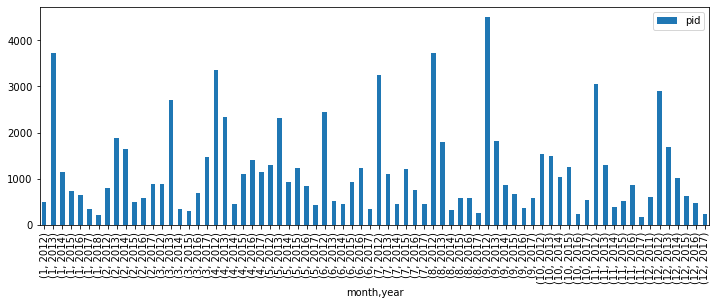

In [42]:
%matplotlib inline

# Crea una columna que almacenará el mes 
data['month'] = data['date'].dt.month

# Crea una columna que almacenará el año 
data['year'] = data['date'].dt.year

# Agrupe por mes y año y cuente los pull requests (pid)
counts = data.groupby(["month","year"]).agg({'pid':'count'})

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

## 5. Is there camaraderie in the project?
**( ¿Hay camaradería en el proyecto? )**

<p>La estructura organizativa varía de un proyecto a otro y puede influir en su éxito como colaborador. Un proyecto que tiene una comunidad muy pequeña puede no ser el mejor para empezar a trabajar. La pequeña comunidad puede indicar una alta barrera de entrada. Esto puede deberse a varios factores, incluida una comunidad que se muestra reacia a aceptar solicitudes de extracción de "extraños", que es difícil trabajar con el código base, etc. Sin embargo, una comunidad grande puede servir como indicador de que el proyecto acepta pull request de nuevos contribuyentes. Un proyecto así sería un buen lugar para comenzar.</p>

<p> Para evaluar la dinámica de la comunidad, trazaremos un histograma del número de solicitudes de pull requests por cada usuario. Una distribución que muestra que hay pocas personas que solo contribuyen con una pequeña cantidad de pull requests se puede usar como indicador de que el proyecto no está recibiendo nuevos colaboradores. </p> 

<AxesSubplot:xlabel='user'>

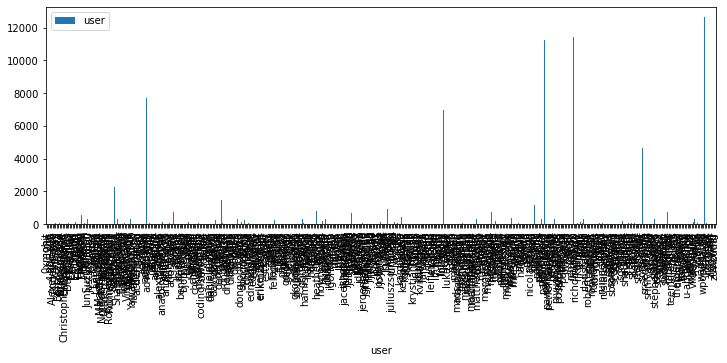

In [47]:
# Pintar los pull requests por cada usuario

# Required for matplotlib
%matplotlib inline

# Agrupar por usuario
by_user = data.groupby(["user"]).agg({'user':'count'})

# Plot the histogram
by_user.plot(kind='bar', figsize = (12,4))

## 6. What files were changed in the last ten pull requests?
**(¿Qué archivos se cambiaron en las últimas diez solicitudes de extracción?)**
<p> Elegir el lugar adecuado para hacer una contribución es tan importante como elegir el proyecto al que contribuir. Algunas partes del código pueden ser estables, otras pueden estar muertas. Contribuir allí podría no tener el mayor impacto. Por lo tanto, es importante comprender las partes del sistema que se han cambiado recientemente. Esto nos permite identificar las áreas "calientes" del código donde ocurre la mayor parte de la actividad. Es posible que concentrarse en esas partes no sea el uso más eficaz de nuestro tiempo.</p> 

In [119]:
# DataFrame.nlargest(n, columns, keep='first')
# Obtiene las filas de un df ordenadas por los n valores más grandes de las columnas.

# Identificar los 10 ultimos pull requests
last_10 = pulls.nlargest(10,'pid', keep='last')

# Join the two data sets
joined_pr = last_10.merge(pull_files,on='pid')

# Identificar los unicos archivos
files = set(joined_pr['file'])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7. Who made the most pull requests to a given file?
**(¿Quién realizó más pull requests a un archivo determinado?)**

Al contribuir a un proyecto, es posible que necesitemos alguna orientación. Podríamos encontrarnos necesitando información sobre el código base. Es importante dirigir cualquier pregunta a la persona adecuada. Los colaboradores de proyectos de código abierto generalmente tienen otros trabajos diarios, por lo que su tiempo es limitado. Es importante dirigir nuestras preguntas a las personas adecuadas. Una forma de identificar el objetivo correcto para nuestras consultas es utilizando su historial de contribuciones.

Identificamos <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> como modificado recientemente. Estamos interesados en los 3 principales desarrolladores que cambiaron ese archivo. Esos desarrolladores son los que tienen más probabilidades de comprender mejor el código. 

In [77]:
data.head()

,pid,user,date,file,month,year
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala,12,2013
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala,12,2013
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check,12,2013
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...,12,2013
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....,12,2013


In [120]:
pulls.head(3)

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00


In [118]:
# Este es el archivo que nos interesa: :
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identificar los commits que cambiaron el archivo 
file_pr = data[data['file'] == file]

# Contar el número de cambios realizados por cada desarrollador 
author_counts = file_pr.groupby(data['user']).agg({'pid':'count'})

# Print the top 3 developers
print(author_counts.sort_values('pid',ascending=[False]).head(3))

          pid
user         
xeno-by    11
retronym    5
soc         4


## 8.  Who made the last ten pull requests on a given file?
**(¿Quién realizó las últimas diez solicitudes de extracción en un archivo determinado?)**
<p> Los proyectos de código abierto sufren una membresía fluctuante. Esto hace que el problema de encontrar a la persona adecuada sea más desafiante: la persona debe tener conocimientos <em> y </em> aún estar involucrada en el proyecto. Es posible que una persona que contribuyó mucho en el pasado ya no esté disponible (o dispuesta) a ayudar. Para obtener una mejor comprensión, debemos investigar la historia más reciente de esa parte particular del sistema.</p>

<p> Como en la tarea anterior, veremos el historial de <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>.</p> 

In [137]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Seleccione los pull requests que cambiaron el archivo de origen
file_pr = pull_files[pull_files['file'] == file]

# Merge los resultados obtenidos con el dataframe pulls
joined_pr = file_pr.merge(pulls,on="pid")

# Encuentre los "usuarios" de las últimas 10 solicitudes de pull requests
users_last_10 = set(joined_pr.nlargest(10,'pid', keep='last')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## 9. The pull requests of two special developers
**( Las solicitudes de extracción de dos desarrolladores especiales )**

<p> Ahora que hemos identificado dos contactos potenciales en los proyectos, necesitamos encontrar a la persona que estuvo más involucrada en el proyecto en los últimos tiempos. Es más probable que esa persona responda nuestras preguntas. Para cada año calendario, estamos interesados en comprender la cantidad de solicitudes de extracción que enviaron los autores. Esto nos dará una imagen de alto nivel de su tendencia de contribución al proyecto. </p> 

In [126]:
data.head(3)

,pid,user,date,file,month,year
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala,12,2013
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala,12,2013
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check,12,2013


<AxesSubplot:xlabel='date'>

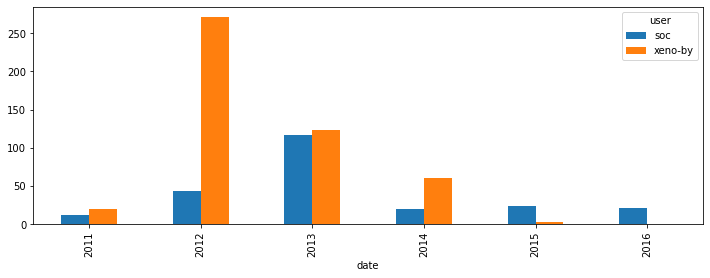

In [154]:
%matplotlib inline

# Los desarrolladores que nos interesan
authors = ['xeno-by', 'soc']

# Obtener todas los pull requests de los desarrolladores
by_author = pulls[pulls['user'].isin(authors)]

# Cuente la cantidad de pull requests enviadas cada año
counts = by_author.groupby(['user', by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convertir la tabla a un formato ancho 
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Grafica los resultados 
counts_wide.plot(kind='bar', figsize = (12,4))

## 10. Visualizing the contributions of each developer
**(Visualizando las contribuciones de cada desarrollador)**
<p>Como se mencionó anteriormente, es importante hacer una distinción entre la experiencia global y los niveles de contribución y los niveles de contribución a un nivel más granular (archivo, submódulo, etc.) En nuestro caso, queremos ver cuál de nuestros dos los desarrolladores de interés tienen la mayor experiencia con el código de un archivo determinado. Mediremos la experiencia por la cantidad de solicitudes de extracción enviadas que afecten a ese archivo y qué tan recientes se enviaron esas solicitudes de extracción. </p> 

In [156]:
pulls.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00


In [157]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


<AxesSubplot:xlabel='date'>

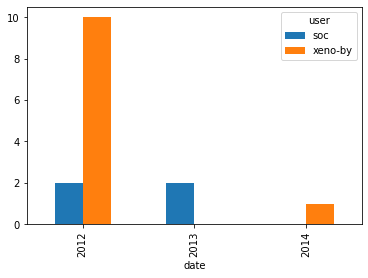

In [165]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')

In [164]:
by_author

,pid,user,date,file,month,year
25,11126653,xeno-by,2013-12-28 19:39:23+00:00,src/reflect/scala/reflect/internal/Mirrors.scala,12,2013
26,11126653,xeno-by,2013-12-28 19:39:23+00:00,test/junit/scala/reflect/internal/MirrorsTest....,12,2013
31,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a.check,12,2013
32,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Macros_1.scala,12,2013
33,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Test_2.scala,12,2013
...,...,...,...,...,...,...
85530,11289742,xeno-by,2014-01-07 16:14:56+00:00,src/reflect/scala/reflect/internal/Importers.s...,1,2014
85531,11289742,xeno-by,2014-01-07 16:14:56+00:00,src/reflect/scala/reflect/internal/Trees.scala,1,2014
85532,11289742,xeno-by,2014-01-07 16:14:56+00:00,src/reflect/scala/reflect/internal/pickling/Un...,1,2014
85533,11289742,xeno-by,2014-01-07 16:14:56+00:00,test/files/scalacheck/quasiquotes/ArbitraryTre...,1,2014
